[Reference](https://blog.jovian.ai/%EF%B8%8Fsupermarket-sales-exploratory-data-analysis-eda-%EF%B8%8F-139a697ac3c3)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Medium

Mounted at /content/drive
/content/drive/MyDrive/Medium


In [2]:
#Import the libraries 

#Save our Project
# import jovian
#Manipulate file
import os

# Numerical/Dataframe libraries
import pandas as pd 
import numpy as np

# Vizualizing NaN values
import missingno as msno

#Geolocalisation
import folium

#Vizualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path= './supermarket_sales - Sheet1.csv'

In [4]:
supermarket_df= pd.read_csv(path)

In [5]:
supermarket_df.head(10).style.background_gradient(cmap='GnBu')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,1/5/2019,13:08,Ewallet,522.830000,4.761905,26.141500,9.100000
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,3/8/2019,10:29,Cash,76.400000,4.761905,3.820000,9.600000
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330000,7,16.215500,340.525500,3/3/2019,13:23,Credit card,324.310000,4.761905,16.215500,7.400000
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220000,8,23.288000,489.048000,1/27/2019,20:33,Ewallet,465.760000,4.761905,23.288000,8.400000
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310000,7,30.208500,634.378500,2/8/2019,10:37,Ewallet,604.170000,4.761905,30.208500,5.300000
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.390000,7,29.886500,627.616500,3/25/2019,18:30,Ewallet,597.730000,4.761905,29.886500,4.100000
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.840000,6,20.652000,433.692000,2/25/2019,14:36,Ewallet,413.040000,4.761905,20.652000,5.800000
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.560000,10,36.780000,772.380000,2/24/2019,11:38,Ewallet,735.600000,4.761905,36.780000,8.000000
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.260000,2,3.626000,76.146000,1/10/2019,17:15,Credit card,72.520000,4.761905,3.626000,7.200000
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.840000,3,8.226000,172.746000,2/20/2019,13:27,Credit card,164.520000,4.761905,8.226000,5.900000


# Data Preprocessing

In [6]:
shape=supermarket_df.shape
print(f'The dataset contains {shape[0]} rows and {shape[1]} columns')

The dataset contains 1000 rows and 17 columns


In [7]:
# #Visualize the nan values in each columns
# msno.matrix(supermarket_df);

In [8]:
# modified_df=supermarket_df.copy()

# Convert date columns into date time 
supermarket_df.Date = pd.to_datetime(supermarket_df.Date)
#Add a month,day and weekday columns
supermarket_df['month']=supermarket_df.Date.dt.month
supermarket_df['day']=supermarket_df.Date.dt.day
supermarket_df['weekday']=supermarket_df.Date.dt.day_name()
#Add a hour and minute columns 
supermarket_df['hour']=supermarket_df.Time.str[0:2]
supermarket_df['minute']=supermarket_df.Time.str[3:5]
#Make it int values
supermarket_df['hour']=pd.to_numeric(supermarket_df['hour'])
supermarket_df['minute']=pd.to_numeric(supermarket_df['minute'])

In [9]:
# cities = pd.DataFrame({'city': ['Yangon', 'Naypyitaw', 'Mandalay'],
#                        'Latitude': [16.8409,19.7633,21.9588],
#                        'Longitude' : [96.1735, 96.0785, 96.0891]})

# market_map = folium.Map(location = [21.9162,95.9560], zoom_start = 5, tiles = 'CartoDB Positron', control_scale = True)

# plt.figure(figsize=(800,600));

# for (i, j) in cities.iterrows():
#   folium.Marker(location = [j.loc['Latitude'], j.loc['Longitude']], popup = j.loc['city'],tooltip = 'click',
#                 icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(market_map)

# market_map

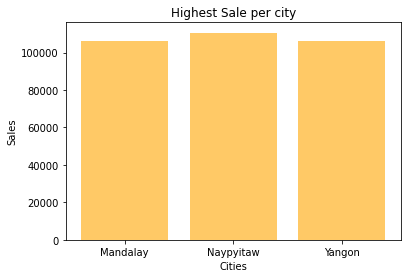

In [10]:
#Parameter for plotting 
sale=supermarket_df.groupby('City').sum()['Total'] #Y-values
cities=[city for city, supermarket_df in supermarket_df.groupby('City')] #X-values

# Plot
plt.bar(cities,sale,color='orange',alpha=.6)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.title('Highest Sale per city')
plt.show()

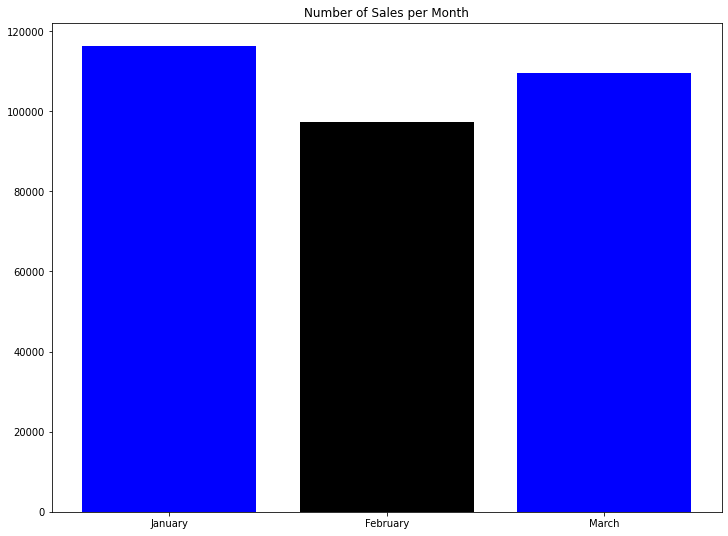

In [11]:
#Parameters for plotting 
sale=supermarket_df.groupby('month').sum()['Total']
month=['January','February','March']
c=['b','k','b']
#Plot
plt.figure(figsize=(12,9))
plt.bar(month,sale,color=c)
plt.title('Number of Sales per Month')
plt.show()

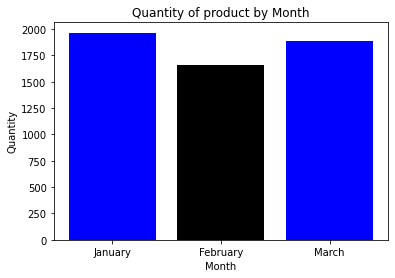

In [12]:
#Y-axis
quantity=supermarket_df.groupby('month').sum()['Quantity']

#Plot
plt.title('Quantity of product by Month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.bar(month,quantity,color=c)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


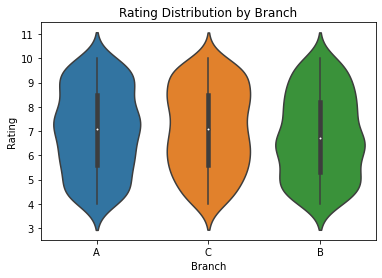

In [13]:
plt.title('Rating Distribution by Branch')
sns.violinplot('Branch','Rating',data=supermarket_df);

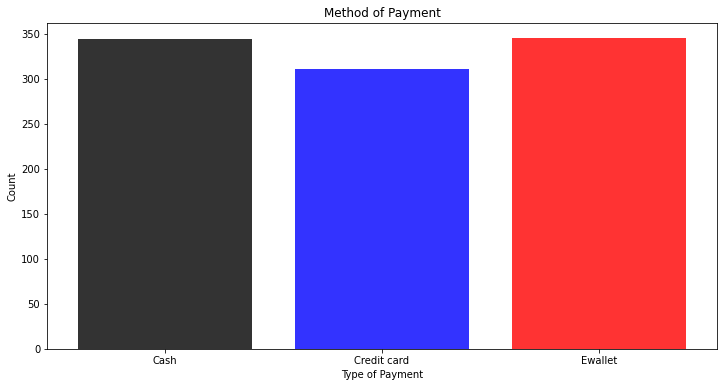

In [14]:
# Parameters for plotting
method=supermarket_df.groupby('Payment').count()['Total']
payment=['Cash','Credit card','Ewallet']
c=['k','b','r']
# Plot 
plt.figure(figsize=(12,6))
plt.bar(payment,method,color=c,alpha=0.8)
plt.xlabel('Type of Payment')
plt.ylabel('Count')
plt.title('Method of Payment')
plt.show()

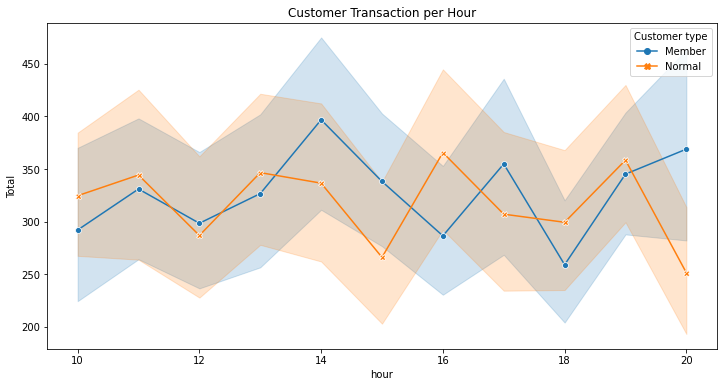

In [15]:
plt.figure(figsize=(12,6))
plt.title('Customer Transaction per Hour')
sns.lineplot(data=supermarket_df,x='hour',y='Total',hue='Customer type',markers=True,style='Customer type',dashes=False); 

In [16]:
#Create a correlation matrix
corr_df=supermarket_df.corr()

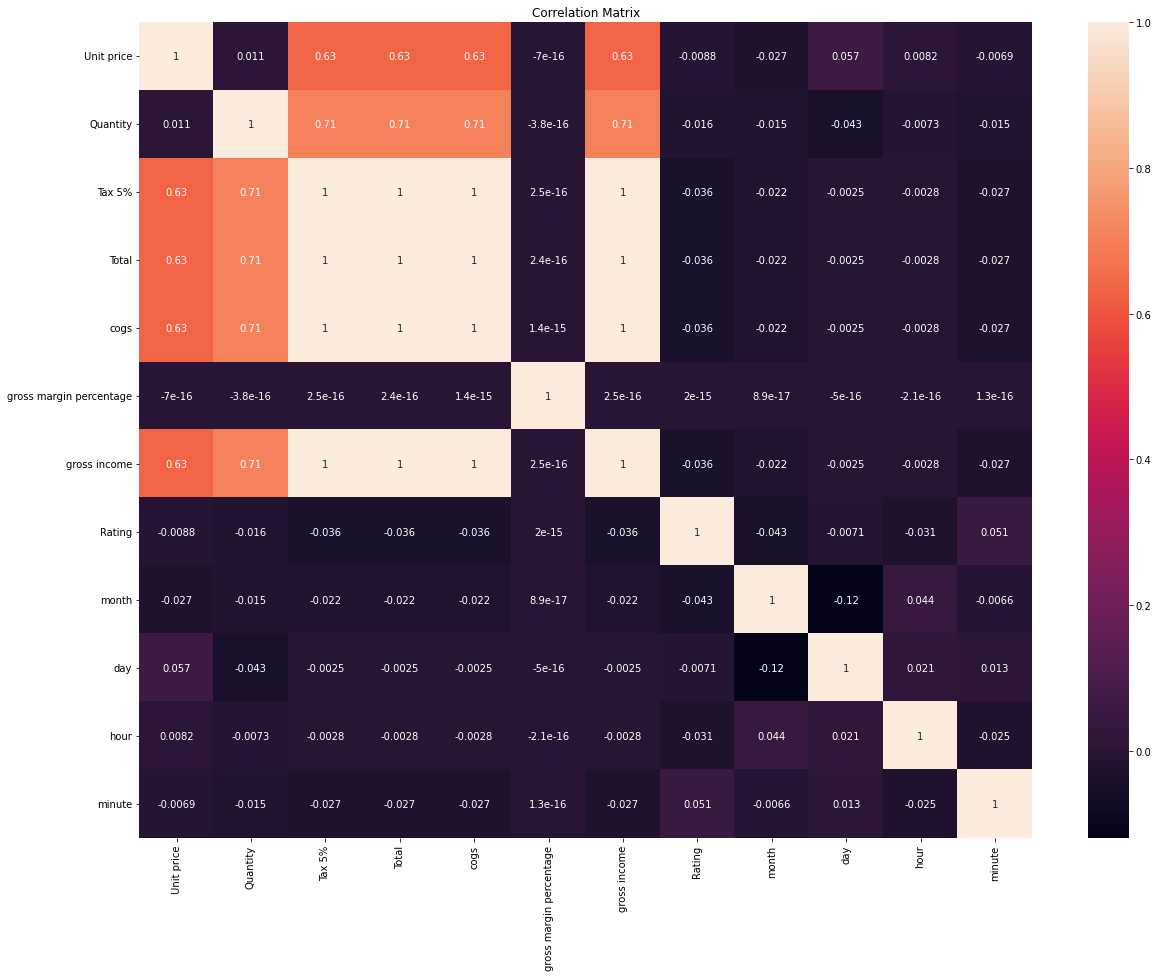

In [17]:
plt.figure(figsize=(20,15))
plt.title('Correlation Matrix')
sns.heatmap(corr_df,annot=True)
plt.show()

In [18]:
sale_branch=supermarket_df.groupby('Branch').sum()['Total']
print('Branch C has the highest number of sale of {}$'.format(max(sale_branch)))

Branch C has the highest number of sale of 110568.70649999994$


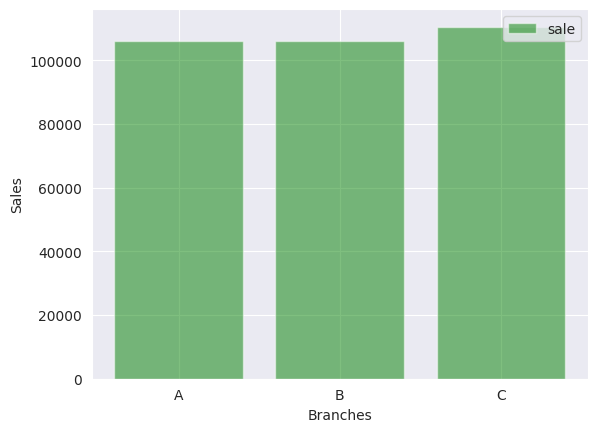

In [19]:
plt.style.use('default')
sns.set_style('darkgrid')
#Paramter for the x-axis
branches = [branch for branch, supermarket_df in supermarket_df.groupby('Branch')]
#Plot the graph

plt.bar(branches,sale_branch,alpha=0.5,color='g')
plt.xlabel('Branches')
plt.ylabel('Sales')
plt.legend(['sale'])
plt.show()

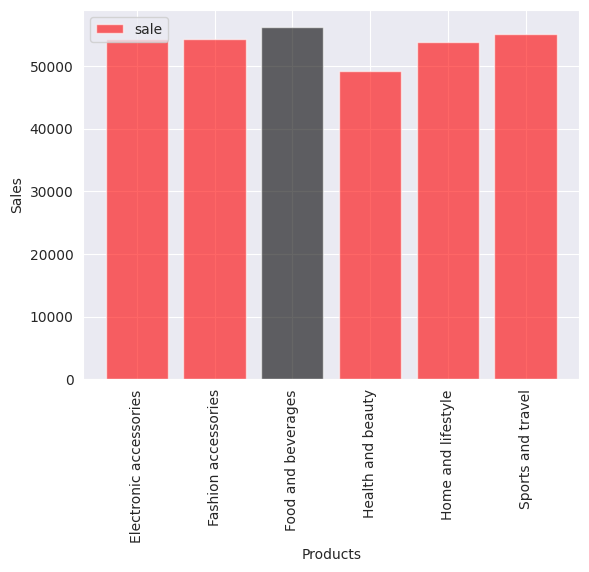

In [20]:
#Parameters
sale_product=supermarket_df.groupby('Product line').sum()['Total']
products =[product for product, supermarket_df in supermarket_df.groupby('Product line')]
c=['r','r','k','r','r','r']
#Plot the graph

plt.bar(products,sale_product,alpha=0.6,color=c)
plt.xticks(products, rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.legend(['sale'],loc='upper left')
plt.show()

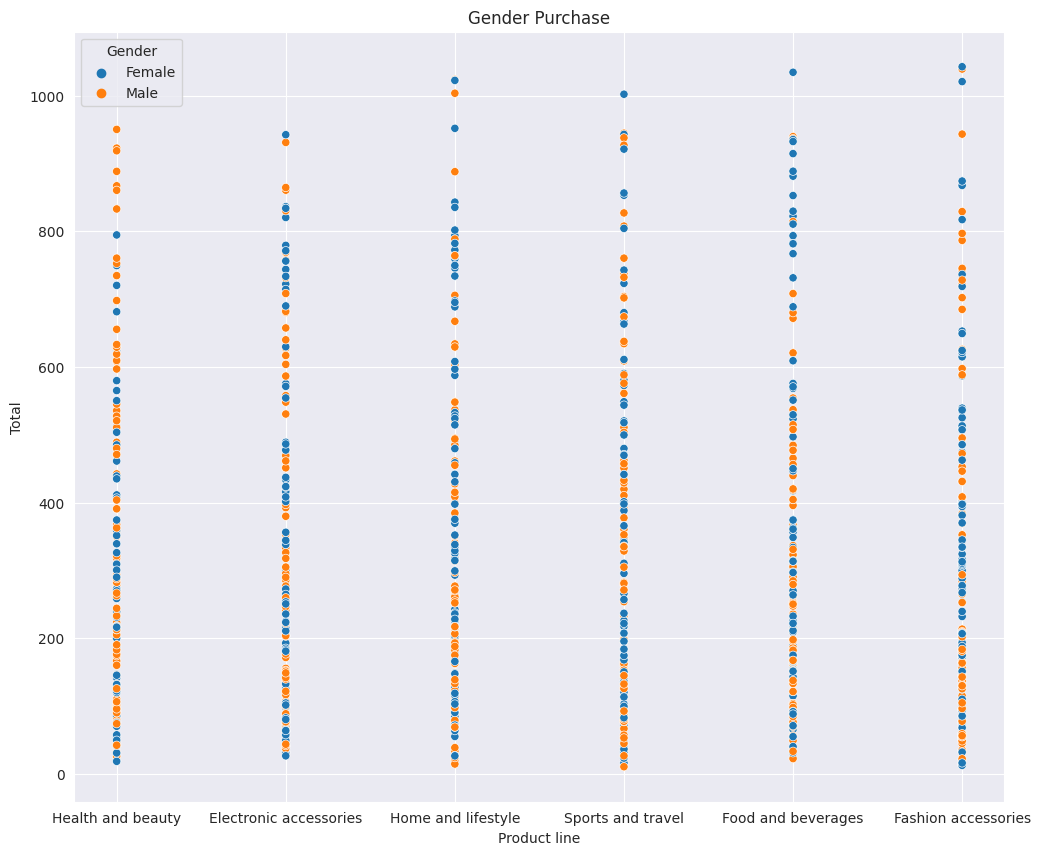

In [21]:
#Plot Gender purchase by product line
plt.figure(figsize=(12,10))
plt.title('Gender Purchase')
sns.scatterplot(x='Product line',y='Total',hue='Gender',data=supermarket_df);

In [22]:
gender_market=supermarket_df[['Gender','Total','Product line','Customer type']].sort_values('Total',ascending=False)

In [23]:
gender_market['male']=gender_market['Gender'][gender_market['Gender'] == 'Male']
gender_market['female']=gender_market['Gender'][gender_market.Gender.str.contains('Female')]
product_gender=gender_market.groupby('Product line').count()
product_gender
# male=product_gender['male']/product_gender['Total'].tolist()
gender_market.drop(columns=['male','female'],inplace=True)

In [24]:
mean_sale=gender_market['Total'].mean()
product_line=gender_market['Product line'].unique()
print('The average sale of product is {:.3f}$'.format(mean_sale))

The average sale of product is 322.967$


In [25]:
people=[]
for product in product_line:
    p=gender_market[(gender_market['Total']>322.96) & (gender_market['Product line'] == product)].count()['Total']
    people.append(p)
num_people=np.sum(people)

In [27]:
member_df=supermarket_df[supermarket_df['Customer type']=='Member']
Ncustomer_df=supermarket_df[supermarket_df['Customer type']=='Normal']

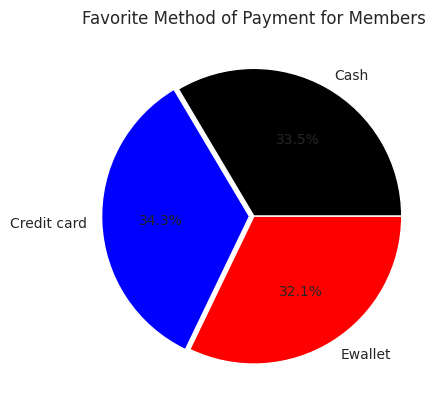

In [28]:
#Parameters for plotting
method=member_df.groupby('Payment').count()['Customer type']
payment=['Cash','Credit card','Ewallet']
c=['k','b','r']
#Plot the bar figure 

plt.pie(method,colors=c,labels=payment,explode=[0,0.03,0],autopct='%1.1f%%')
plt.title('Favorite Method of Payment for Members')
plt.show()

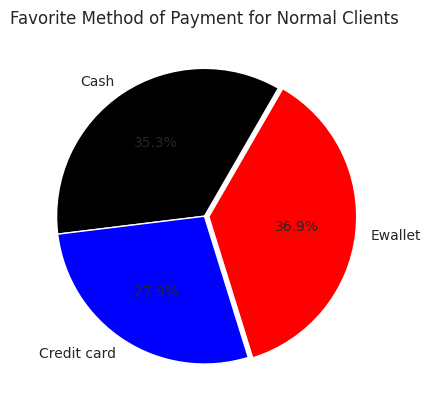

In [29]:
#Parameters for plotting
method=Ncustomer_df.groupby('Payment').count()['Customer type']
payment=['Cash','Credit card','Ewallet']
c=['k','b','r']
#Plot 
plt.pie(method,colors=c,labels=payment,startangle=60,explode=[0,0,0.03],autopct='%1.1f%%')
plt.title('Favorite Method of Payment for Normal Clients')
plt.show()

In [31]:
#Parameter for plotting
sale=supermarket_df.groupby('hour').sum()['Total']
hours=[hour for hour, supermarket_df in supermarket_df.groupby('hour')]

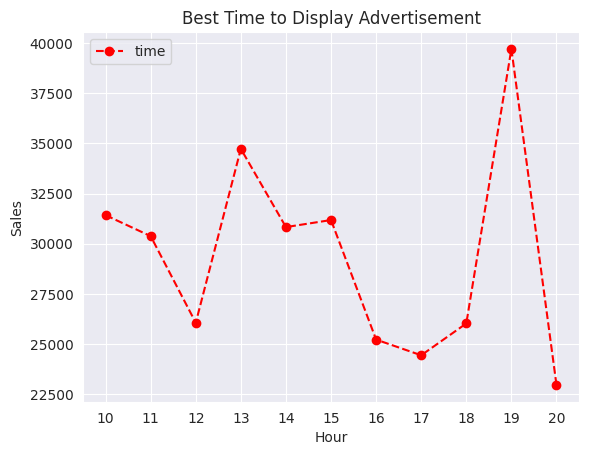

In [32]:
#Plot
plt.plot(hours,sale,'o--r')
plt.xlabel('Hour')
plt.xticks(hours)
plt.ylabel('Sales')
plt.title('Best Time to Display Advertisement')
plt.legend(['time'])
plt.show()